<a href="https://colab.research.google.com/github/YaswanthPothineni/Chicken_Disease/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Explore the Data

In [2]:
fake_path = '/content/Fake.csv'
true_path = '/content/True.csv'

In [3]:
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

 Creating a new column **"label"** to represent the target feature (real or fake) and creating a new DataFrame by concatinating them

In [8]:
true_df['label'] = 'Real'
fake_df['label'] = 'Fake'

news_df = pd.concat([true_df, fake_df], ignore_index=True)

In [10]:
news_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [11]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [12]:
news_df = news_df.drop(columns=['subject', 'date'])
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [13]:
news_df.head()

,title,text,label
0,Robert Parry: What to Do About ‘Fake News’,Robert Parry Consortium NewsIn the wake of Do...,Fake
1,Hammond says UK 'very close' to deal on EU cit...,BUDAPEST (Reuters) - Britain is very close to ...,Real
2,POPE SHAMES AMERICANS From Mexico For Anti-Imm...,"Pope Francis has joined Democrat legislators, ...",Fake
3,U.S. consumer financial agency's backers seek ...,WASHINGTON (Reuters) - Two lawmakers and six c...,Real
4,BEWARE THE UNITED NATIONS PUSH FOR “GLOBAL GOV...,Beware of this agenda that s Agenda 21 for tho...,Fake


# Exploratory Data Analysis (EDA)

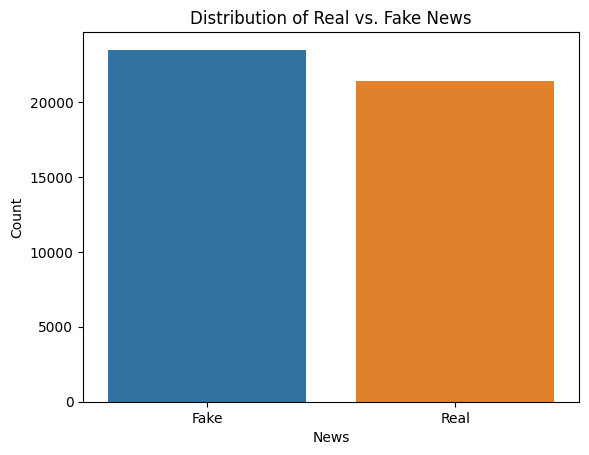

In [15]:
sns.countplot(data=news_df, x='label')

plt.title('Distribution of Real vs. Fake News')
plt.xlabel('News')
plt.ylabel('Count')

plt.show();

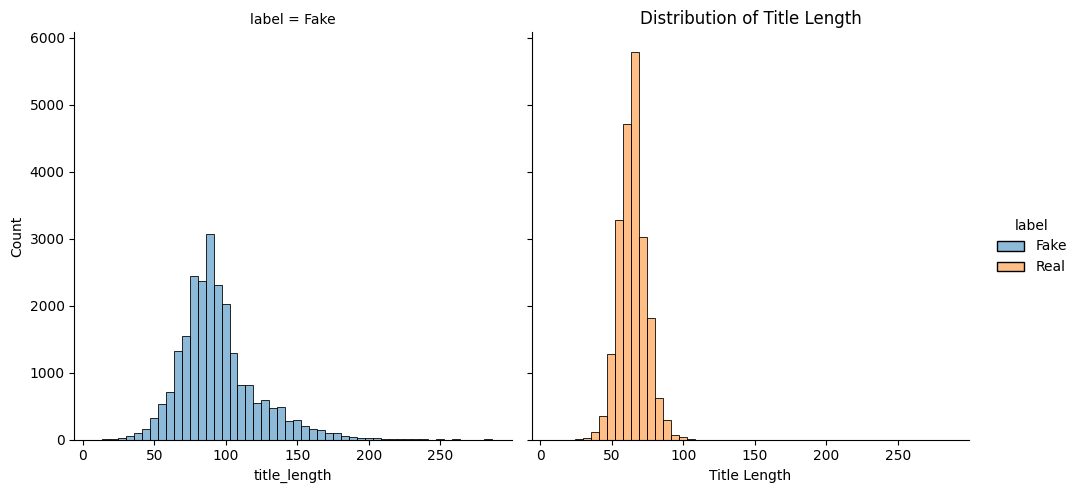

In [16]:
news_df['title_length'] = news_df['title'].str.len()

sns.displot(data=news_df, x='title_length', bins=50, col='label', hue='label')

plt.title('Distribution of Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')

plt.show();

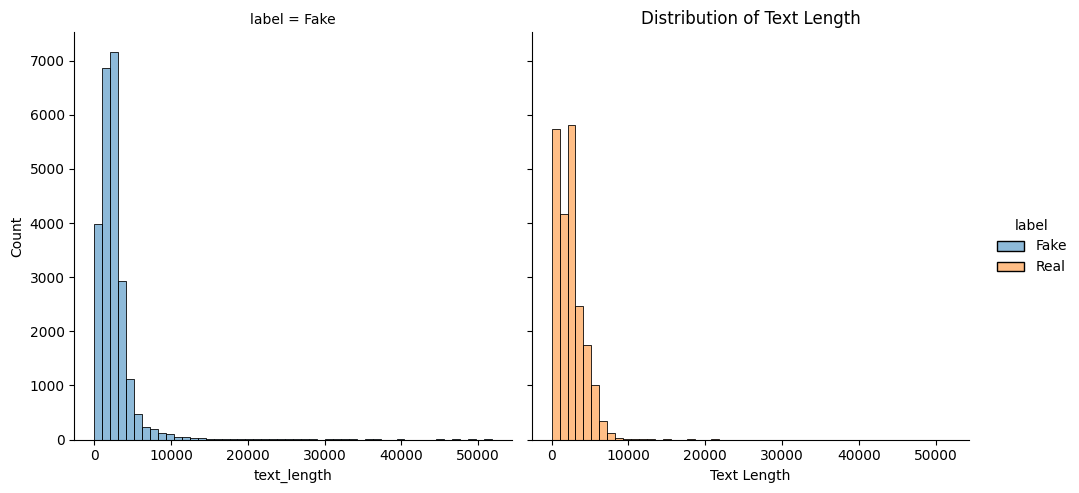

In [17]:
news_df['text_length'] = news_df['text'].str.len()

sns.displot(data=news_df, x='text_length', bins=50, col='label', hue='label')

plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.show()

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
def generate_and_plot_wordcloud(text, title, ax):
    wordcloud = WordCloud(max_words=500,
                          width=1600,
                          height=800,
                          background_color='white',
                          stopwords=STOPWORDS,
                          colormap='viridis').generate(text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=18)
    ax.axis('off')

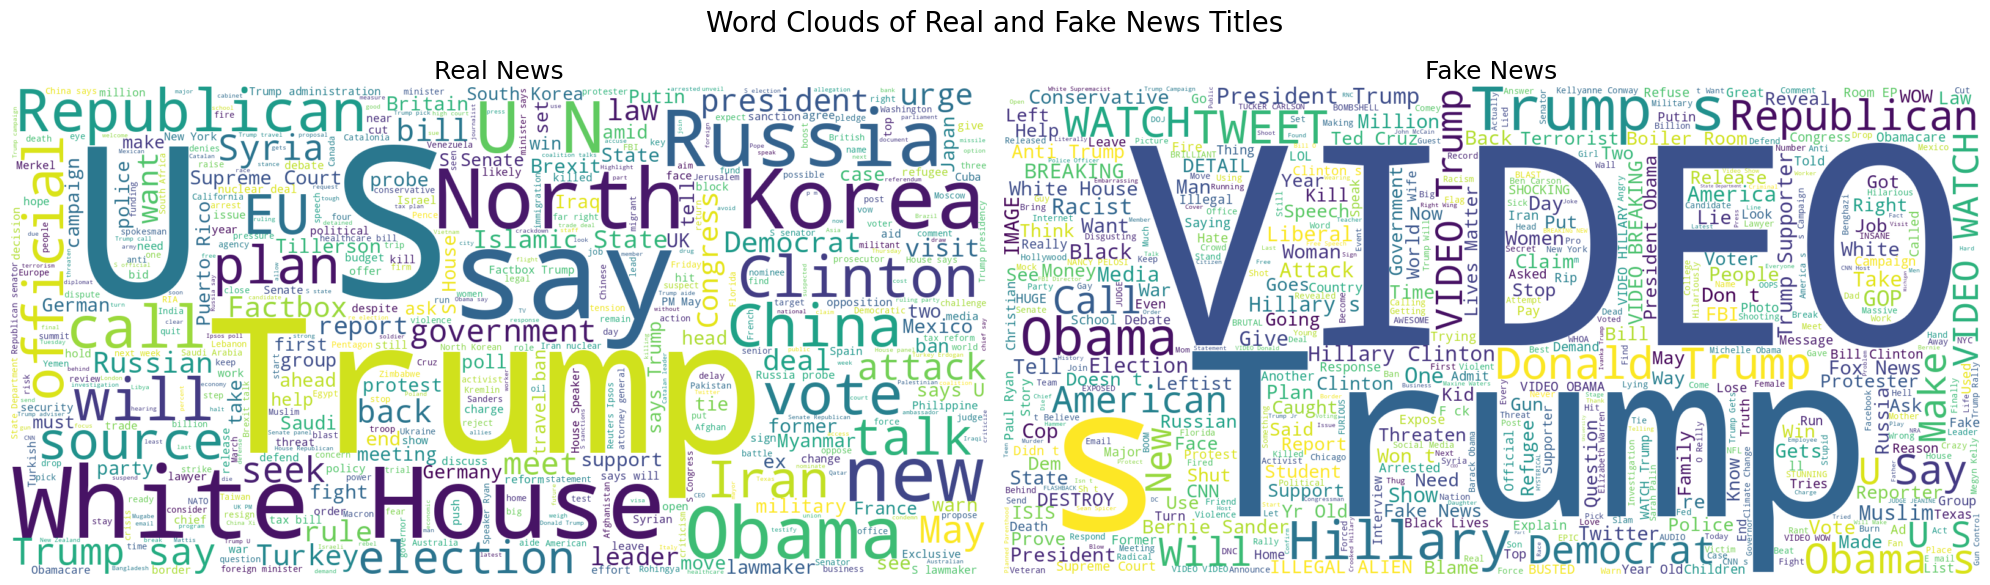

In [20]:
real_title = ' '.join(news_df.query('label == "Real"')['title'])
fake_title = ' '.join(news_df.query('label == "Fake"')['title'])

plt.figure(figsize=(20, 20))

ax1 = plt.subplot(1, 2, 1)
generate_and_plot_wordcloud(real_title, 'Real News', ax1)

ax2 = plt.subplot(1, 2, 2)
generate_and_plot_wordcloud(fake_title, 'Fake News', ax2)

plt.suptitle('Word Clouds of Real and Fake News Titles', fontsize=20, y=0.65)

plt.tight_layout()
plt.show();

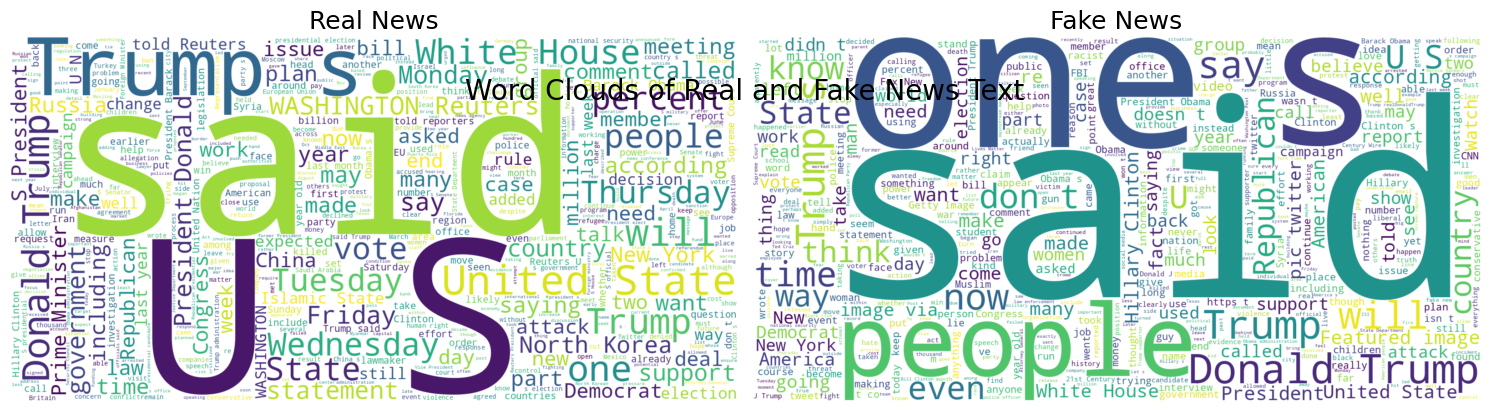

In [21]:
real_text = ' '.join(news_df.query('label == "Real"')['text'])
fake_text = ' '.join(news_df.query('label == "Fake"')['text'])

plt.figure(figsize=(15, 8))

ax1 = plt.subplot(1, 2, 1)
generate_and_plot_wordcloud(real_text, 'Real News', ax1)

ax2 = plt.subplot(1, 2, 2)
generate_and_plot_wordcloud(fake_text, 'Fake News', ax2)

plt.suptitle('Word Clouds of Real and Fake News Text', fontsize=20, y=0.65)

plt.tight_layout()
plt.show()

# Data Cleaning and Preprocessing

In [22]:
import re

In [23]:
def clean(news):
    # Convert the news article to lowercase
    news = news.lower()

    # Remove links
    news = re.sub(r'https\S+', '', news)

    # Remove HTML tags
    news = re.sub(r'<.*?>+', '', news)

    # Remove special characters
    news = re.sub(r'[^\w\s]', '', news)

    # Remove numbers and words containing numbers
    news = re.sub(r'\w*\d\w*', '', news)

    # Replace multiple spaces with a single space
    news = re.sub(r'\s+', ' ', news)

    return news.strip()

In [26]:
from tqdm import tqdm_notebook
news_df['clean_title'] = news_df['title'].apply(clean)
news_df['clean_text'] = news_df['text'].apply(clean)

In [27]:
news_df['clean_title']

0                  robert parry what to do about fake news
1        hammond says uk very close to deal on eu citiz...
2        pope shames americans from mexico for antiimmi...
3        us consumer financial agencys backers seek to ...
4        beware the united nations push for global gove...
                               ...                        
44893    frankfurt defuses massive wwii bomb after evac...
44894    federal judge steps in to review legroom on co...
44895    whose convention speech had more viewersthe an...
44896    baltimore police union wants an independant pr...
44897    the obama legacy worst economic growth of all ...
Name: clean_title, Length: 44898, dtype: object

In [28]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Stem the tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Remove stopwords
    additional_stop_words = [
        'fake', 'news', 'false', 'hoax', 'said', 'misinformation',
        'disinformation', 'rumor', 'unverified', 'not', 'true',
        'misleading', 'bogus', 'fabricated', 'baseless',
    ]

    stop_words = set(stopwords.words('english') + additional_stop_words)
    filtered_tokens = [token for token in stemmed_tokens if token not in stop_words]

    # Join the filtered tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

In [31]:
news_df['preprocessed_title'] = news_df['clean_title'].apply(preprocess)
news_df['preprocessed_text'] = news_df['clean_text'].apply(preprocess)

In [33]:
news_df['preprocessed_text']

0        robert parri consortium newsin wake donald tru...
1        budapest reuter britain veri close reach agree...
2        pope franci ha join democrat legisl along hand...
3        washington reuter two lawmak six consum advoca...
4        bewar thi agenda agenda familiar term sustain ...
                               ...                        
44893    frankfurt reuter german explos expert defus ma...
44894    firebrand conserv ann coulter expos delta airl...
44895    would appear american voter interest republica...
44896    polic union came almost immedi mosbi press con...
44897    last week commerc depart releas third revis fo...
Name: preprocessed_text, Length: 44898, dtype: object

# Building Machine Learning Models

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [35]:
X = news_df['preprocessed_title'] + ' ' + news_df['preprocessed_text']
y = news_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
vectorizer = TfidfVectorizer(max_features=10_000, stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [37]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy:.4%}")
    print(f"{model_name} Classification Report:\n{report}")

In [39]:
lr_model = LogisticRegression(random_state=42)
train_and_evaluate_model(lr_model, 'Logistic Regression')

Logistic Regression Accuracy: 98.5301%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4748
        Real       0.98      0.99      0.98      4232

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [40]:
svc_model = LinearSVC(random_state=42)
train_and_evaluate_model(svc_model, 'Linear SVC')

Linear SVC Accuracy: 99.4989%
Linear SVC Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4748
        Real       0.99      1.00      0.99      4232

    accuracy                           0.99      8980
   macro avg       0.99      1.00      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [41]:
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_model, 'Decision Tree')

Decision Tree Accuracy: 99.4321%
Decision Tree Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4748
        Real       0.99      0.99      0.99      4232

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

